<a href="https://colab.research.google.com/github/Riddhi-14/Assessments/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np


In [ ]:
from google.colab import files

# Upload the image from your local desktop
uploaded = files.upload()

# Save the uploaded image to Colab
for filename in uploaded.keys():
    image_path = filename
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])


Saving Projectnew.jpg to Projectnew.jpg


In [ ]:
from PIL import Image

# Provide the correct path to your image file
image_path = "Projectnew.jpg"

# Open the image using PIL
image = Image.open(image_path)


In [ ]:
# Load the image
image = cv2.imread('Projectnew.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Apply thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


In [ ]:
# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)


In [ ]:
# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)


In [ ]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


In [ ]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)


In [ ]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

In [ ]:
# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # mark watershed boundaries


In [ ]:
# Count the objects
num_objects = len(np.unique(markers)) - 1  # subtract 1 for background


Number of objects: 2


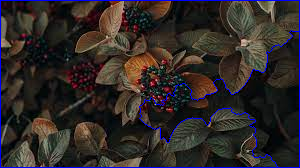

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Display the result
print(f"Number of objects: {num_objects}")

# Assuming 'image' is the variable containing your processed image
cv2_imshow(image)
